# 基础模型的训练

In [1]:
import joblib
import pathlib
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

PROCESSED_DATA_DIR = pathlib.Path("../dataset/processed")

## 读取数据

### 读取数据集和划分训练集与检验集

In [2]:
from sklearn.model_selection import train_test_split

inputs = joblib.load(PROCESSED_DATA_DIR / "inputs.joblib")
target = joblib.load(PROCESSED_DATA_DIR / "target.joblib")
X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=0.2,
    stratify=target, random_state=42
)
y_test.value_counts()

fraudulent
0    3369
1    2254
Name: count, dtype: int64

### 读取特征预处理器

In [3]:
preprocessor = joblib.load(PROCESSED_DATA_DIR / "preprocessor.joblib")
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('TfidfVectorizer',
                                 TfidfVectorizer(max_df=0.4, max_features=800,
                                                 min_df=0.1, ngram_range=(1, 2),
                                                 stop_words=['ｃ］', '㈧', '不可抗拒',
                                                             'leg', '豁然',
                                                             'himself', '个别',
                                                             '着呢', 'plant',
                                                             '怎么', '不单', '但愿',
                                                             '从优', 'pretty',
                                                             '［①⑧］', 'election',
                                                             '通过', '如次', 'road',
                                                             '尔', '勃然', '上去',
                                                             '促进', '较比', '/',
                                                             '长线', 'walshmouth',
                                                             'sit',
                                                             'discussion',
                                                             'office', ...],
                                                 sublin...
                                                 token_pattern='(?u)\\b[a-zA-Z]{2,}\\b'),
                                 'text'),
                                ('OrdinalEncoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['required_education', 'required_experience']),
                                ('OneHotEncoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['employment_type', 'function', 'location',
                                  'department', 'industry']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['salary', 'text_length'])])

## 训练与评估基础模型

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

### 训练模型

#### 逻辑回归（LogisticRegression）模型

In [5]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("SGDClassifier", LogisticRegression(max_iter=1000, random_state=42)),
    ],
    # memory="cache",
    verbose=True,
)
lr.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   5.9s
[Pipeline] ..... (step 2 of 2) Processing SGDClassifier, total=   0.3s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('SGDClassifier',
                 Lo

#### 随机梯度下降模型

In [6]:
from sklearn.linear_model import SGDClassifier

sgdc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("SGDClassifier", SGDClassifier(loss="log_loss", random_state=42)),
    ],
    # memory="cache",
    verbose=True,
)
sgdc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   5.4s
[Pipeline] ..... (step 2 of 2) Processing SGDClassifier, total=   0.1s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('SGDClassifier',
                 SG

#### 决策树模型

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "DecisionTreeClassifier", 
            DecisionTreeClassifier(
                max_depth=4, 
                random_state=42
            )
        )
    ],
    # memory="cache",
    verbose=True,
)
tree.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   5.2s
[Pipeline]  (step 2 of 2) Processing DecisionTreeClassifier, total=   0.1s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('DecisionTreeClassifier',
          

#### KNN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "KNeighborsClassifier", 
            KNeighborsClassifier()
        )
    ],
    # memory="cache",
    verbose=True,
)
knc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   5.3s
[Pipeline]  (step 2 of 2) Processing KNeighborsClassifier, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('KNeighborsClassifier', KNeighborsCl

#### 支持向量机模型

In [9]:
from sklearn.svm import SVC

svc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("SVC", SVC(probability=True, random_state=42)),
    ],
    # memory="cache",
    verbose=True,
)
svc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.5s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=  33.6s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('SVC', SVC(probability=True, random_

#### 随机森林(RandomForestClassifier)模型

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        (
            'RandomForestClassifier', 
            RandomForestClassifier(random_state=42)
        )
    ],
    # memory="cache",
    verbose=True,
)
rf.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.7s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   4.2s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('RandomForestClassifier',
          

#### AdaBoostClassifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier

abc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "AdaBoostClassifier", 
            AdaBoostClassifier(random_state=42)
        ),
    ],
    # memory="cache",
    verbose=True,
)
abc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.6s
[Pipeline]  (step 2 of 2) Processing AdaBoostClassifier, total=   1.6s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('AdaBoostClassifier', AdaBoostClassi

#### GradientBoostingClassifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "GradientBoostingClassifier", GradientBoostingClassifier(random_state=42)
        ),
    ],
    # memory="cache",
    verbose=True,
)
gbc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.8s
[Pipeline]  (step 2 of 2) Processing GradientBoostingClassifier, total=   7.2s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('GradientBoostingClassifier',
      

#### BaggingClassifier

In [13]:
from sklearn.ensemble import BaggingClassifier


bc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "BaggingClassifier", 
            BaggingClassifier(random_state=42)
        ),
    ],
    # memory="cache",
    verbose=True,
)
bc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.4s
[Pipeline] . (step 2 of 2) Processing BaggingClassifier, total=  17.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('BaggingClassifier', BaggingClassifi

#### XGBClassifier

In [14]:
from xgboost import XGBClassifier

xgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "XGBClassifier", 
            XGBClassifier(random_state=42)
        ),
    ],
    # memory="cache",
    verbose=True,
)
xgb.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.6s
[Pipeline] ..... (step 2 of 2) Processing XGBClassifier, total=   1.4s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))],
         verbose=True)

#### MLPClassifier

In [15]:
from sklearn.neural_network import MLPClassifier

mlpc = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("MLPClassifier", MLPClassifier(random_state=42)),
    ],
    # memory="cache",
    verbose=True,
)
mlpc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   4.5s
[Pipeline] ..... (step 2 of 2) Processing MLPClassifier, total= 2.1min


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('MLPClassifier', MLPClassifier(rando

#### GaussianNB

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

gnb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("to_dense", to_dense),
        ("GaussianNB", GaussianNB()),
    ],
    # memory="cache",
    verbose=True,
)
gnb.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   4.5s
[Pipeline] .......... (step 2 of 3) Processing to_dense, total=   0.2s
[Pipeline] ........ (step 3 of 3) Processing GaussianNB, total=   1.1s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('TfidfVectorizer',
                                                  TfidfVectorizer(max_df=0.4,
                                                                  max_features=800,
                                                                  min_df=0.1,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['ｃ］',
                                                                              '㈧',
                                                                              '不可抗拒',
                                                                              'leg',
                                                                              '豁然',
                                                                              'himself',
                                                                              '个别',
                                                                              '着呢',
                                                                              'plant',
                                                                              '怎么',
                                                                              '不单',
                                                                              '但愿',
                                                                              '从优',
                                                                              'pretty',
                                                                              '［①⑧］',
                                                                              'election',
                                                                              '通过',
                                                                              '如次',
                                                                              'road',
                                                                              '尔',
                                                                              '勃然',
                                                                              '上去',
                                                                              '促进',
                                                                              '较比',
                                                                              '/',
                                                                              '长线',
                                                                              'walshmouth',
                                                                              'sit',
                                                                              '...
                                                  ['required_education',
                                                   'required_experience']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'function', 'location',
                                                   'department', 'industry']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['salary', 'text_length'])])),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fe1b273a320>)),
                ('GaussianNB', GaussianNB())],
         verbose=True)

### 评估模型

In [17]:
# 加载模型
models = {
    "SGDClassifier": sgdc,
    "DecisionTreeClassifier": tree,
    "LogisticRegression": lr,
    "KNeighborsClassifier": knc,
    "SVC": svc,
    "RandomForestClassifier": rf,
    "AdaBoostClassifier": abc,
    "GradientBoostingClassifier": gbc,
    "BaggingClassifier": bc,
    "XGBClassifier": xgb,
    "MLPClassifier": mlpc,
    "GaussianNB": gnb
}

#### 准确率

* `accuracy_score`
* `precision_score`
* `recall_score`
* `f1_score`
* `roc_auc_score`

In [18]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
)

In [19]:
results = []
for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    metrics = {
        "ROC AUC": (
            roc_auc_score(y_train, y_train_proba),
            roc_auc_score(y_test, y_test_proba),
        ),
        "F1 Score": (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
        "Accuracy": (
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_test, y_test_pred),
        ),
        "Precision": (
            precision_score(y_train, y_train_pred),
            precision_score(y_test, y_test_pred),
        ),
        "Recall": (
            recall_score(y_train, y_train_pred),
            recall_score(y_test, y_test_pred),
        ),
    }
    result = {"Model": model_name}
    for metric, (train, test) in metrics.items():
        result[f"Train {metric}"] = train
        result[f"Test {metric}"] = test
    results.append(result)
results

[{'Model': 'SGDClassifier',
  'Train ROC AUC': np.float64(0.9951169059501234),
  'Test ROC AUC': np.float64(0.9925556966369342),
  'Train F1 Score': 0.956452348381213,
  'Test F1 Score': 0.956184390689183,
  'Train Accuracy': 0.9660293463761672,
  'Test Accuracy': 0.965854526053708,
  'Train Precision': 0.9838180112570356,
  'Test Precision': 0.9844924812030075,
  'Train Recall': 0.9305678793256433,
  'Test Recall': 0.9294587400177462},
 {'Model': 'DecisionTreeClassifier',
  'Train ROC AUC': np.float64(0.9712333434835686),
  'Test ROC AUC': np.float64(0.969964283673127),
  'Train F1 Score': 0.9500200377855385,
  'Test F1 Score': 0.9483310470964792,
  'Train Accuracy': 0.9611827478879502,
  'Test Accuracy': 0.9598079317090521,
  'Train Precision': 0.9817773044610105,
  'Test Precision': 0.9783018867924528,
  'Train Recall': 0.9202528837622005,
  'Test Recall': 0.9201419698314108},
 {'Model': 'LogisticRegression',
  'Train ROC AUC': np.float64(0.996540257492856),
  'Test ROC AUC': np.flo

In [20]:
def split_col(col):
    if col == 'Model':
        return ('Model', '')
    else:
        split_parts = col.split(' ')
        return (split_parts[1], split_parts[0])

results_df = pd.DataFrame(results)
new_columns = [split_col(col) for col in results_df.columns]
results_df.columns = pd.MultiIndex.from_tuples(new_columns)
results_df

Model       ROC                  F1            \
                                   Train      Test     Train      Test   
0                SGDClassifier  0.995117  0.992556  0.956452  0.956184   
1       DecisionTreeClassifier  0.971233  0.969964  0.950020  0.948331   
2           LogisticRegression  0.996540  0.993322  0.964286  0.960326   
3         KNeighborsClassifier  0.998807  0.990524  0.976742  0.968478   
4                          SVC  0.992185  0.989884  0.947806  0.948582   
5       RandomForestClassifier  1.000000  0.996989  1.000000  0.971054   
6           AdaBoostClassifier  0.987738  0.986367  0.934950  0.937703   
7   GradientBoostingClassifier  0.996043  0.993228  0.964391  0.959654   
8            BaggingClassifier  0.999987  0.991447  0.996105  0.972034   
9                XGBClassifier  0.999794  0.996277  0.989423  0.973435   
10               MLPClassifier  0.999690  0.995140  0.985205  0.966771   
11                  GaussianNB  0.875612  0.830390  0.843247  0.797702   

    Accuracy           Precision              Recall            
       Train      Test     Train      Test     Train      Test  
0   0.966029  0.965855  0.983818  0.984492  0.930568  0.929459  
1   0.961183  0.959808  0.981777  0.978302  0.920253  0.920142  
2   0.971899  0.968878  0.982949  0.981919  0.946318  0.939663  
3   0.981503  0.974924  0.984780  0.976115  0.968833  0.960958  
4   0.959760  0.960341  0.987264  0.987518  0.911380  0.912600  
5   1.000000  0.977236  1.000000  0.990314  1.000000  0.952529  
6   0.950156  0.952339  0.980406  0.984863  0.893523  0.894854  
7   0.972076  0.968522  0.986543  0.986873  0.943212  0.933895  
8   0.996888  0.977948  0.999330  0.988532  0.992902  0.956078  
9   0.991552  0.979015  0.993183  0.988117  0.985692  0.959184  
10  0.988217  0.973680  0.991906  0.978636  0.978594  0.955191  
11  0.850956  0.799573  0.728978  0.669882  1.000000  0.985803

#### 混淆矩阵

In [21]:
import matplotlib.pyplot as plt
import scienceplots

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

plt.style.use(["science", "notebook", "no-latex"])

In [22]:
# 加载模型
models = {
    "SGDClassifier": sgdc,
    "DecisionTreeClassifier": tree,
    "LogisticRegression": lr,
    "KNeighborsClassifier": knc,
    "SVC": svc,
    "RandomForestClassifier": rf,
    "MLPClassifier": mlpc,
    "GaussianNB": gnb
}

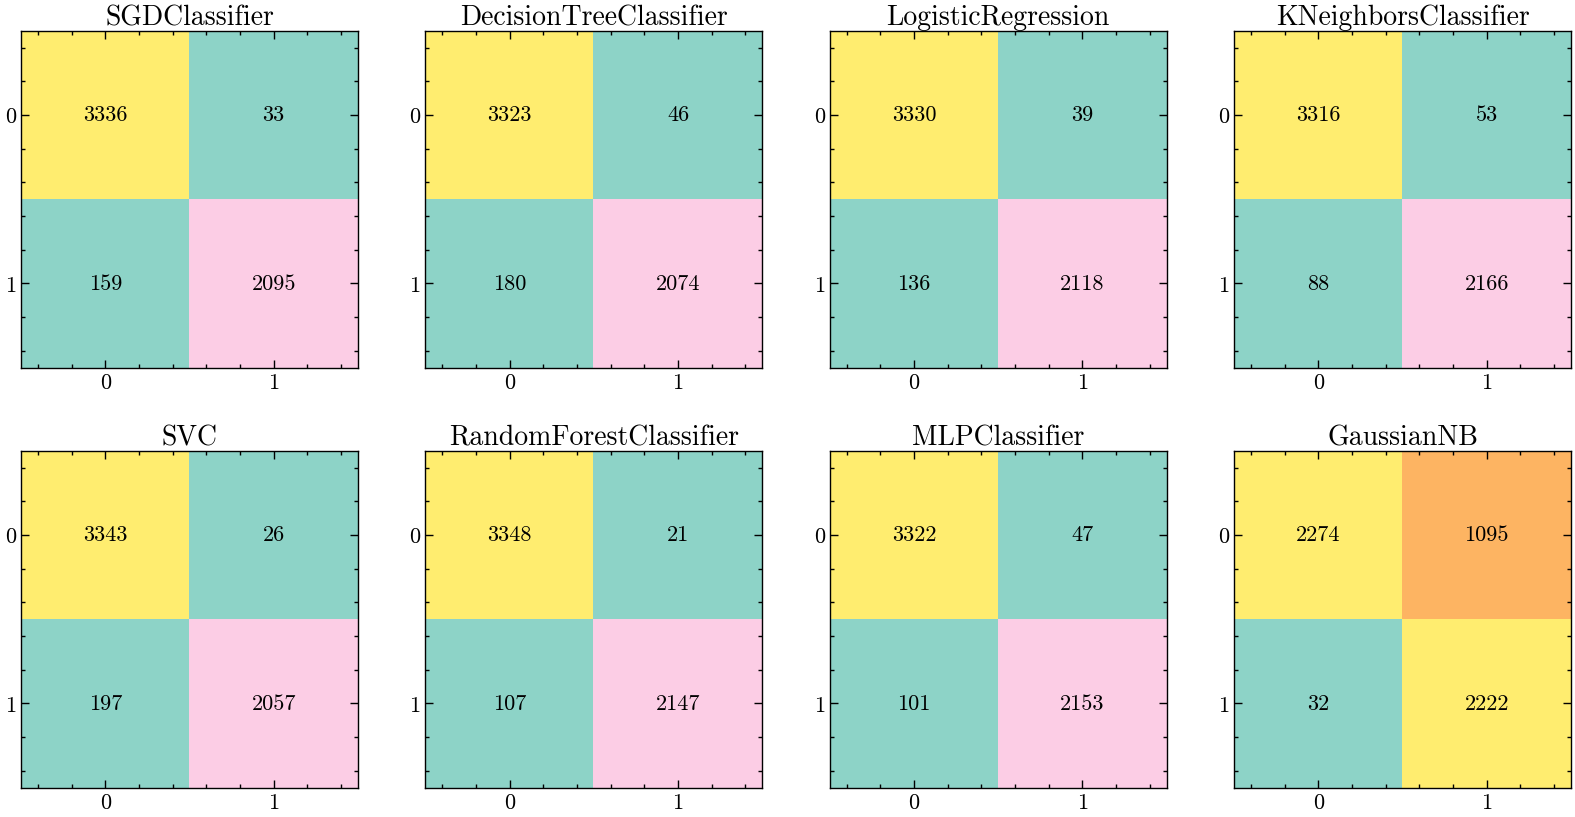

In [23]:
n_models = len(models)
n_cols = 4
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(
        ax=axes[i],
        colorbar=False,
        cmap="Set3",
        text_kw={"fontsize": 16, "color": "black"},
    )
    axes[i].set_title(f"{model_name}", fontsize=20, pad=2)
    axes[i].tick_params(labelsize=16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

## 保存数据

### 保存模型

In [50]:
for model_name, model in models.items():
    # if model_name != "GaussianNB":
    joblib.dump(
        value=model,
        filename=f"../app/models/base-models/{model_name}.joblib",
        compress=5
    )

### 保存模型准确率

In [51]:
results_df.to_json(
    "../dataset/external/model_results.json", 
    orient="records"
)